In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
df = pd.read_csv("Aluminium Historical Data_2012.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 22, 2022","2,528.00","2,509.00","2,528.00","2,464.00",-,-0.22%
1,"Jun 21, 2022","2,533.50","2,526.00","2,530.00","2,526.00",-,0.26%
2,"Jun 20, 2022","2,527.00","2,488.00","2,482.00","2,481.00",21.89K,1.16%
3,"Jun 17, 2022","2,498.00","2,500.00","2,500.00","2,500.00",40.74K,-0.26%
4,"Jun 16, 2022","2,504.50","2,535.00","2,529.00","2,525.00",56.34K,-3.39%
...,...,...,...,...,...,...,...
2023,"Jun 20, 2014","1,888.50","1,888.50","1,888.50","1,888.50",18.51K,-0.11%
2024,"Jun 19, 2014","1,890.50","1,890.50","1,890.50","1,890.50",26.66K,0.85%
2025,"Jun 18, 2014","1,874.50","1,874.50","1,874.50","1,874.50",26.12K,1.21%
2026,"Jun 17, 2014","1,852.00","1,852.00","1,852.00","1,852.00",45.55K,0.64%


In [ ]:
# Drop a specific column by its name
df.drop('Change %', axis=1, inplace=True)
print(df.head())

df.drop('Vol.', axis=1, inplace=True)
print(df.head())

In [28]:
# Convert Date column to datetime format and sort by date
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(by="Date")
print(df.head())

           Date    Price      Open      High       Low
2027 2014-06-16  1840.25  1,840.25  1,840.25  1,840.25
2026 2014-06-17  1852.00  1,852.00  1,852.00  1,852.00
2025 2014-06-18  1874.50  1,874.50  1,874.50  1,874.50
2024 2014-06-19  1890.50  1,890.50  1,890.50  1,890.50
2023 2014-06-20  1888.50  1,888.50  1,888.50  1,888.50


In [30]:
# Convert Price column to numeric values
df["Price"] = df["Price"].replace(',', '', regex=True).astype(float)
print(df.head())

           Date    Price      Open      High       Low
2027 2014-06-16  1840.25  1,840.25  1,840.25  1,840.25
2026 2014-06-17  1852.00  1,852.00  1,852.00  1,852.00
2025 2014-06-18  1874.50  1,874.50  1,874.50  1,874.50
2024 2014-06-19  1890.50  1,890.50  1,890.50  1,890.50
2023 2014-06-20  1888.50  1,888.50  1,888.50  1,888.50


In [32]:
# Use only the Date and Price columns for time series analysis
df.set_index("Date", inplace=True)
print(df.head())

              Price      Open      High       Low
Date                                             
2014-06-16  1840.25  1,840.25  1,840.25  1,840.25
2014-06-17  1852.00  1,852.00  1,852.00  1,852.00
2014-06-18  1874.50  1,874.50  1,874.50  1,874.50
2014-06-19  1890.50  1,890.50  1,890.50  1,890.50
2014-06-20  1888.50  1,888.50  1,888.50  1,888.50


In [34]:
# Fit an ARIMA model (AutoRegressive Integrated Moving Average)
model = ARIMA(df["Price"], order=(5,1,0))  # Example order (p,d,q)
model_fit = model.fit()
print(df.head())

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


              Price      Open      High       Low
Date                                             
2014-06-16  1840.25  1,840.25  1,840.25  1,840.25
2014-06-17  1852.00  1,852.00  1,852.00  1,852.00
2014-06-18  1874.50  1,874.50  1,874.50  1,874.50
2014-06-19  1890.50  1,890.50  1,890.50  1,890.50
2014-06-20  1888.50  1,888.50  1,888.50  1,888.50


In [36]:
# Forecast the next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)
print(df.head())

              Price      Open      High       Low
Date                                             
2014-06-16  1840.25  1,840.25  1,840.25  1,840.25
2014-06-17  1852.00  1,852.00  1,852.00  1,852.00
2014-06-18  1874.50  1,874.50  1,874.50  1,874.50
2014-06-19  1890.50  1,890.50  1,890.50  1,890.50
2014-06-20  1888.50  1,888.50  1,888.50  1,888.50


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


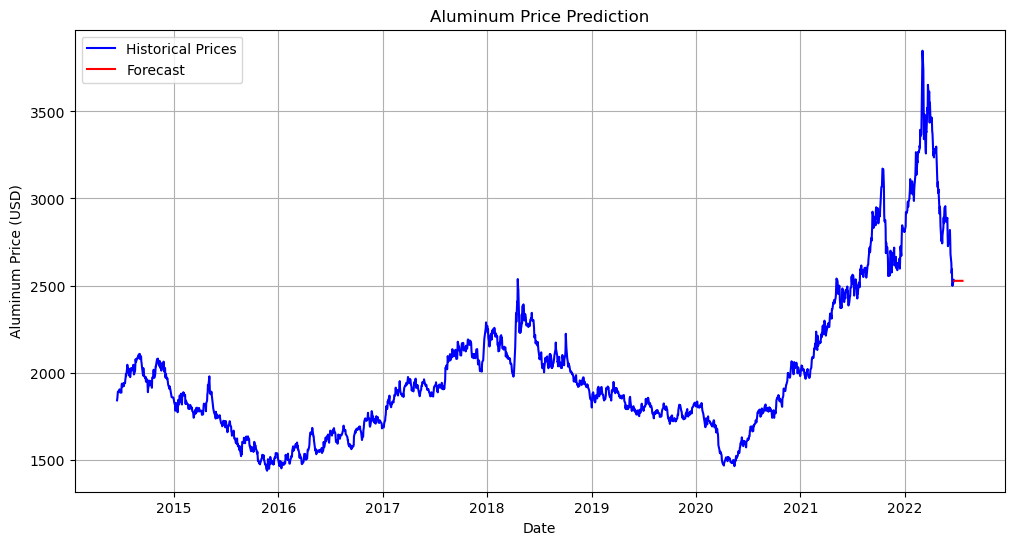

In [38]:
# Plot the historical prices and the forecast
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Price"], label="Historical Prices", color="blue")
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq="D")[1:], forecast, label="Forecast", color="red")
plt.xlabel("Date")
plt.ylabel("Aluminum Price (USD)")
plt.title("Aluminum Price Prediction")
plt.legend()
plt.grid()
plt.show()

In [40]:
# Display forecasted prices
print("Future Price Predictions:")
print(forecast)

Future Price Predictions:
2028    2525.747310
2029    2526.391424
2030    2527.075763
2031    2527.034080
2032    2526.890336
2033    2526.864171
2034    2526.894376
2035    2526.904193
2036    2526.900283
2037    2526.896942
2038    2526.897359
2039    2526.898076
2040    2526.898171
2041    2526.898007
2042    2526.897966
2043    2526.897989
2044    2526.898005
2045    2526.898002
2046    2526.897998
2047    2526.897998
2048    2526.897999
2049    2526.897999
2050    2526.897999
2051    2526.897999
2052    2526.897999
2053    2526.897999
2054    2526.897999
2055    2526.897999
2056    2526.897999
2057    2526.897999
Name: predicted_mean, dtype: float64


In [42]:
# Additional text for future predictions
print("\nBased on our model, the aluminum price is expected to stabilize around 2526.90 USD over the next 30 days, with minimal fluctuations. This forecast provides a general trend but may vary due to market conditions and external factors.")



Based on our model, the aluminum price is expected to stabilize around 2526.90 USD over the next 30 days, with minimal fluctuations. This forecast provides a general trend but may vary due to market conditions and external factors.
